# User set : 
### `BaseDir`, `ProblemDir`, `Fileindex` 
and `Filenamebase` if needed

In [1]:
BaseDir    = '/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/'
ProblemDir = 'CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220'
Fileindex  = 500
nSpecies   = 2

## Search and read-in data ...

In [2]:
Diretory = BaseDir + ProblemDir
Filenamebase = '/deleptonizationwave_hdf5_chk_'
# prepare before call functions
fullfilename = Diretory + Filenamebase + '{:04d}'.format(Fileindex)
print('Searching for :', fullfilename)

import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

NumberDensity = nSpecies * ['?']
EnergyDensity = nSpecies * ['?']
AverageEnergy = nSpecies * ['?']
ZerothMoment  = nSpecies * ['?']
FluxDensity   = nSpecies * ['?']
Luminosity    = nSpecies * ['?']
FirstMoment   = nSpecies * ['?']
AverageFluxFactor = nSpecies * ['?']

for i in range(nSpecies):
    
    [NumberDensity[i], EnergyDensity[i], AverageEnergy[i], ZerothMoment[i], ECenter, Radius] \
    = fycal.ReadMoment_Zeroth(fullfilename, Diretory, iSpecies=i+1)
    
    [FluxDensity[i], Luminosity[i], FirstMoment[i], ECenter, Radius] \
    = fycal.ReadMoment_First(fullfilename, Diretory, iSpecies=i+1)

    AverageFluxFactor[i] \
    = np.true_divide(FluxDensity[i],EnergyDensity[i])

Searching for : /Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/CS25100ms_BTr_staticFluid_CB/48X40E_1_12_LS220/deleptonizationwave_hdf5_chk_0500


# Making plots ...

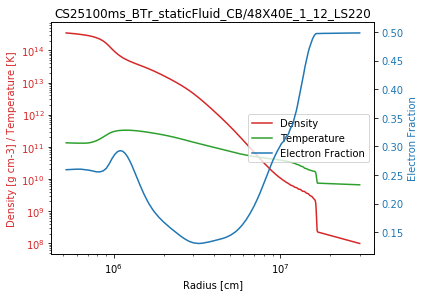

In [3]:
# rho-T-Ye
%matplotlib inline
import flashytlib.plot as fyplt
fyplt.plt_1D_Eos(fullfilename,optional_title=ProblemDir)

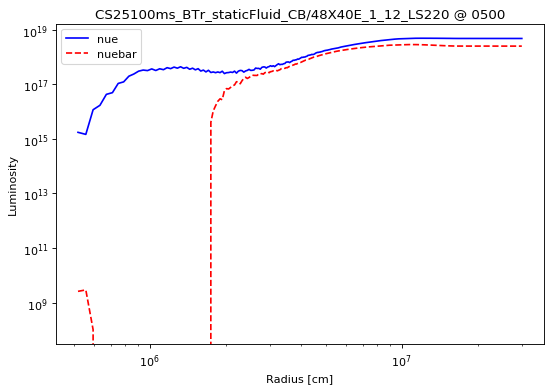

In [4]:
# luminositoes
import matplotlib.pyplot as plt
import matplotlib


colors = ['blue','red']
labels = ['nue','nuebar']
LineType     = ['solid','dashed']

fig, ax1 = plt.subplots(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Luminosity')
lns = nSpecies *['?']
for i in range(nSpecies):
    lns[i] = ax1.plot(Radius,Luminosity[i],\
                      linestyle=LineType[i],color=colors[i],label=labels[i])
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='y')
ax1.set_title(ProblemDir+' @ {:04d}'.format(Fileindex))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='best')

plt.show()

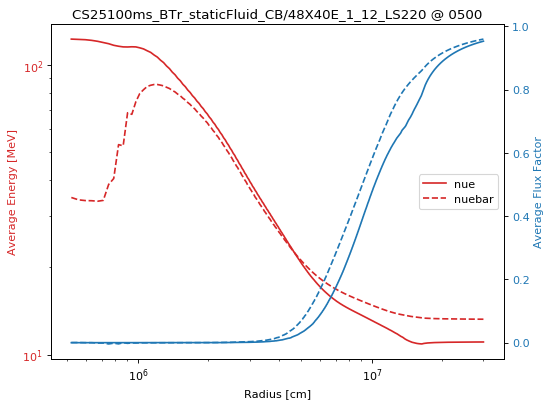

In [5]:
# Number Density & Average Flux Factor

import matplotlib.pyplot as plt

labels = ['nue','nuebar']
LineType     = ['solid','dashed']

fig, ax1 = plt.subplots(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]',color=color)
lns = 2 * nSpecies *['?']
for i in range(nSpecies):
    lns[i] = ax1.plot(Radius,AverageEnergy[i],\
                      linestyle=LineType[i], color=color, label=labels[i])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Flux Factor', color=color)
for i in range(nSpecies):
    lns[i+nSpecies] = ax2.plot(Radius, AverageFluxFactor[i],\
                               linestyle=LineType[i],color=color, label=labels[i])
ax2.set_yscale('linear')
    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='right')
ax1.set_title(ProblemDir+' @ {:04d}'.format(Fileindex))

plt.show()

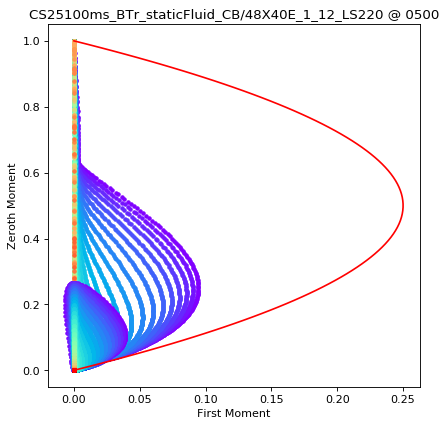

In [6]:
# Realizability

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = cm.rainbow(np.linspace(0, 1, len(ECenter)))
fig, ax1 = plt.subplots(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

for iS in range(nSpecies):
    for ie in range(len(ECenter)):
        ax1.plot(FirstMoment[iS][:,ie],ZerothMoment[iS][:,ie],\
                 '.',color=colors[ie])

yy = np.linspace(0, 1, 100)
xxP_FD = np.multiply(yy,1-yy)
ax1.plot(xxP_FD,yy,color='red')
ax1.set_xlabel('First Moment')
ax1.set_ylabel('Zeroth Moment')

ax1.set_title(ProblemDir+' @ {:04d}'.format(Fileindex))
plt.show()

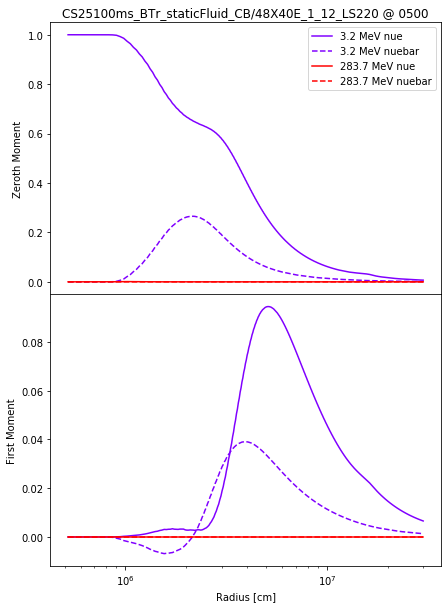

In [7]:
# Lowest energetic & Highest energetic J / H vs Radius
iEs = [0, len(ECenter)-1]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType     = ['solid','dashed']
labels = ['nue','nuebar']

colors = cm.rainbow(np.linspace(0, 1, len(ECenter)))

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for iE1 in iEs:
    for iS in range(nSpecies):
        axs[0].plot(Radius,ZerothMoment[iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    label= '%.1f MeV '%(ECenter[iE1])+labels[iS])
        axs[1].plot(Radius,FirstMoment[iS][:,iE1],\
                    linestyle=LineType[iS],color=colors[iE1],\
                    label= '%.1f MeV '%(ECenter[iE1])+labels[iS])

axs[0].set_ylabel('Zeroth Moment')
axs[1].set_ylabel('First Moment')
axs[1].set_xlabel('Radius [cm]')
axs[1].set_xscale('log')
axs[0].legend(loc='best')

axs[0].set_title(ProblemDir+' @ {:04d}'.format(Fileindex))
plt.show()

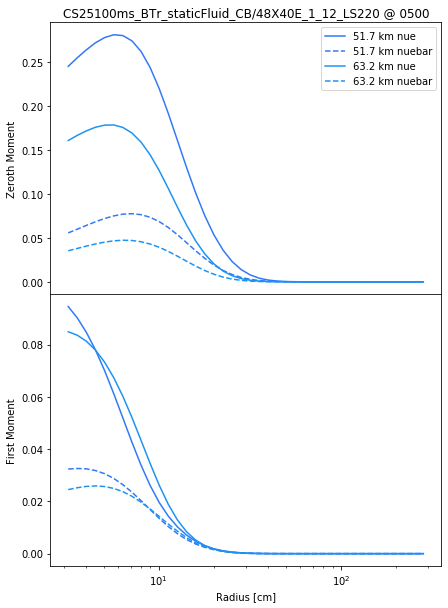

In [8]:
# J / H in spectrum for given radius
iXs = [121,151]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType     = ['solid','dashed']
labels = ['nue','nuebar']

colors = cm.rainbow(np.linspace(0, 1, len(Radius)))

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for iX in iXs:
    for iS in range(nSpecies):
        axs[0].plot(ECenter,ZerothMoment[iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    label= '%.1f km '%(Radius[iX]*1.0e-5)+labels[iS])
        axs[1].plot(ECenter,FirstMoment[iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    label= '%.1f km '%(Radius[iX]*1.0e-5)+labels[iS])

axs[0].set_ylabel('Zeroth Moment')
axs[1].set_ylabel('First Moment')
axs[1].set_xlabel('Radius [cm]')
axs[1].set_xscale('log')
axs[0].legend(loc='best')

axs[0].set_title(ProblemDir+' @ {:04d}'.format(Fileindex))
plt.show()